# Telecom Churn Case Study(Machine learning -II)

Telecom Churn - ML Case Study
- Tilak Shah

### Problem Statement




In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.



##### Definitions of churn
 
. There are various ways to define churn, such as:
 
##### Revenue-based churn:

. Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.
 
##### Usage-based churn:

Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.n

### Objective
. To Predict the customers who are about to churn from a telecom operator
. Business Objective is to predict the High Value Customers only
. We need to predict Churn on the basis of Action Period (Churn period data needs to be deleted after labelling)
  Churn would be based on Usage


### Steps and Flow


Data Understanding

Data Cleaning and Handeling Missing Values

Filtering High Value Customer

Deriving Churn

Deriving New Features

Data Visualization-Univariate Analysis/Bivariate Analysis

Data Preparation

Data Modeling and Eavlaution

Conclusions

## 1. Import  Libraries

In [1]:
# import required libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Import the logistic regression module
from sklearn.linear_model import LogisticRegression

# Importing 'variance_inflation_factor' or VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import RFE for RFE selection
from sklearn.feature_selection import RFE

# Importing statsmodels
import statsmodels.api as sm

# Importing the precision recall curve
from sklearn.metrics import precision_recall_curve

# Importing evaluation metrics from scikitlearn 
from sklearn import metrics

from imblearn.over_sampling import SMOTE

from sklearn.decomposition import IncrementalPCA

# To suppress the warnings which will be raised
import warnings
warnings.filterwarnings('ignore')

# Displaying all Columns without restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)


# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [4]:
pip install --upgrade imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# 2. Reading Data (.csv File) and Understanding Data 

In [5]:
# Reading data
churn = pd.read_csv(r"D:\Telecom_Project\telecom_churn_data.csv")

In [6]:
# Looking at the Data and Columns
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [7]:
#look at the last 5 rows
churn.tail() 

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,2.25,0.00,0.0,3.21,0.11,18.18,57.83,55.49,27.03,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.41,3.01,3.21,0.11,0.00,0.0,0.0,0.0,20.59,60.84,58.71,27.14,27.68,20.78,40.94,22.06,47.96,46.93,76.08,82.89,17.45,5.16,43.79,49.46,93.09,72.88,160.83,154.43,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00

In [8]:
# Craeting backup of data
original = churn.copy()

In [9]:
#check the columns of data
churn.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [10]:
#Checking the numerical columns data distribution
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [11]:
#check dataframe for null and datatype 
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [12]:

churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [13]:
# Checking for shape of a data set
churn.shape

(99999, 226)

In [14]:
# We can see that there are 226 Columns

In [15]:
# Checking for null values
churn.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

# 3. Data Cleaning , Imputing missing values 

In [16]:
# look at missing value percentage in each column

In [17]:
(churn.isna().mean().round(4) * 100).sort_values(ascending = False)

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

In [18]:
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

churn[recharge_cols].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [19]:
# Checking for Recharge Event(date) and Recharge Values Combination
churn.loc[churn.total_rech_data_7.isnull() & churn.date_of_last_rech_data_7.isnull(), ["total_rech_data_7", "date_of_last_rech_data_7"]].head(5)

,total_rech_data_7,date_of_last_rech_data_7
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN


In [20]:
churn.loc[churn.total_rech_data_6.isnull() & churn.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(5)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN


In [21]:
churn.loc[churn.total_rech_data_8.isnull() & churn.date_of_last_rech_data_8.isnull(), ["total_rech_data_8", "date_of_last_rech_data_8"]].head(5)

,total_rech_data_8,date_of_last_rech_data_8
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN


In [22]:
churn.loc[churn.total_rech_data_9.isnull() & churn.date_of_last_rech_data_9.isnull(), ["total_rech_data_9", "date_of_last_rech_data_9"]].head(5)

,total_rech_data_9,date_of_last_rech_data_9
0,NaN,NaN
1,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN


In [23]:
# create a list of recharge columns where we will impute missing values with zeroes
# List of columns to impute with 0
zero_impute = [
    'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
    'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
    'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
]

# Impute missing values in the specified columns with 0
churn[zero_impute] = churn[zero_impute].fillna(0)


In [24]:
# now we have to  make sure the values are imputed correctly for that we can check "Missing value ratio"
churn[zero_impute].isnull().sum()*100/churn.shape[1]

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64

In [25]:
# now we can check the "statistics Summary"
churn[zero_impute].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.619726,0.681837,0.698517,0.632806,48.445409,51.393440,52.027022,49.961089,31.792048,32.406314,33.113011,32.387644
std,1.760541,1.924382,1.963417,1.669040,127.743863,132.629365,131.182609,127.804280,77.248778,78.342435,78.872739,78.818696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,8.250000,17.000000,23.000000,17.000000,8.000000,14.000000,17.000000,17.000000
max,61.000000,54.000000,60.000000,84.000000,7546.000000,4365.000000,4076.000000,4061.000000,1555.000000,1555.000000,1555.000000,1555.000000


In [26]:
# Identify categorical and numerical columns using Data type in the churn DataFrame
Object_columns = churn.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = churn.select_dtypes(include=['number']).columns.tolist()

# Print the lists to verify
print("Object columns:", Object_columns)


Object columns: ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']


In [27]:

Object_columns = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']

# Display the head of the specified columns
print(churn[Object_columns].head(2))

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0            9/30/2014           6/21/2014           7/16/2014   
1            9/30/2014           6/29/2014           7/31/2014   

  date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0            8/8/2014           9/28/2014                6/21/2014   
1           8/28/2014           9/30/2014                      NaN   

  date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  
0                7/16/2014                 8/8/2014                      NaN  
1                7/25/2014                8/10/2014                      NaN  


In [28]:
# drop date columns
churn = churn.drop(Object_columns, axis=1)
#check the shape again
churn.shape

(99999, 214)

In [29]:

all_numerical_columns = churn.select_dtypes(include=['number']).columns.tolist()
print("All_Numerical columns:", all_numerical_columns)


All_Numerical columns: ['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_

In [30]:
# drop date columns
churn = churn.drop(['mobile_number', 'circle_id'], axis=1)
#check the shape again
churn.shape

(99999, 212)

In [31]:
columns_with_less_than_4_unique_values = []

# Iterate through the columns
for column in churn.columns:
    # Check if the number of unique values is less than 5
    if churn[column].nunique() < 4:
        columns_with_less_than_4_unique_values.append(column)
    
# Print unique values for each of these columns
for column in columns_with_less_than_4_unique_values:
    print("Unique values for column '{}':".format(column))
    print(churn[column].unique())
    print()


Unique values for column 'loc_og_t2o_mou':
[ 0. nan]

Unique values for column 'std_og_t2o_mou':
[ 0. nan]

Unique values for column 'loc_ic_t2o_mou':
[ 0. nan]

Unique values for column 'std_og_t2c_mou_6':
[nan  0.]

Unique values for column 'std_og_t2c_mou_7':
[nan  0.]

Unique values for column 'std_og_t2c_mou_8':
[ 0. nan]

Unique values for column 'std_og_t2c_mou_9':
[nan  0.]

Unique values for column 'std_ic_t2o_mou_6':
[nan  0.]

Unique values for column 'std_ic_t2o_mou_7':
[nan  0.]

Unique values for column 'std_ic_t2o_mou_8':
[ 0. nan]

Unique values for column 'std_ic_t2o_mou_9':
[nan  0.]

Unique values for column 'night_pck_user_6':
[ 0. nan  1.]

Unique values for column 'night_pck_user_7':
[ 0. nan  1.]

Unique values for column 'night_pck_user_8':
[ 0. nan  1.]

Unique values for column 'night_pck_user_9':
[nan  0.  1.]

Unique values for column 'fb_user_6':
[ 1. nan  0.]

Unique values for column 'fb_user_7':
[ 1. nan  0.]

Unique values for column 'fb_user_8':
[ 1. n

In [32]:
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [33]:
# replace missing values with '-1' in categorical columns
churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna(-1))

In [34]:
# missing value ratio
churn[cat_cols].isnull().sum()*100/churn.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

In [35]:
# Re Defining Numeric Varables

In [36]:
num_cols = [column for column in churn.columns if column not in cat_cols]

In [37]:
num_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

Droping variables with more than 70% of missing values

In [38]:
b=(churn.isna().mean().round(4) * 100)

In [39]:
higher_null_value_cols = b[b.values >=70.00].index.tolist()

In [40]:
len(higher_null_value_cols)

16

In [41]:
# 16 Variables have more than 70% of Missing values

In [42]:
for x in higher_null_value_cols:
        churn = churn.drop(columns=x, axis=1)

In [43]:
churn.shape

(99999, 196)

In [44]:
# rechecking the missing values for how many missing values has left
churn.isnull().sum()*100/churn.shape[0]

loc_og_t2o_mou        1.018010
std_og_t2o_mou        1.018010
loc_ic_t2o_mou        1.018010
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           3.937039
onnet_mou_7           3.859039
onnet_mou_8           5.378054
onnet_mou_9           7.745077
offnet_mou_6          3.937039
offnet_mou_7          3.859039
offnet_mou_8          5.378054
offnet_mou_9          7.745077
roam_ic_mou_6         3.937039
roam_ic_mou_7         3.859039
roam_ic_mou_8         5.378054
roam_ic_mou_9         7.745077
roam_og_mou_6         3.937039
roam_og_mou_7         3.859039
roam_og_mou_8         5.378054
roam_og_mou_9         7.745077
loc_og_t2t_mou_6      3.937039
loc_og_t2t_mou_7      3.859039
loc_og_t2t_mou_8      5.378054
loc_og_t2t_mou_9      7.745077
loc_og_t2m_mou_6      3.937039
loc_og_t2m_mou_7      3.859039
loc_og_t2m_mou_8      5.378054
loc_og_t2m_mou_9      7.745077
loc_og_t2f_mou_6      3.937039
loc_og_t

only numerical variables have the missing values

In [45]:
num_cols = [column for column in churn.columns if column not in cat_cols]

for remaining numerical variables missing values hear we are imputing with meadian 

In [46]:
#imputing with meadian for num_cols
churn[num_cols] = churn[num_cols].apply(lambda x: x.fillna(x.median()))

In [47]:
#again checking for the missing values
churn.isnull().sum()*100/churn.shape[0]

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

In [48]:
churn.shape

(99999, 196)


# 4. Filter high-value customers

In [49]:
# Here we will try filter customer who spends more on recharges and Data considered to as high value customers 

Hear we can take good phase ( it means month 6 and 7) data to get high value customers

In [50]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount 
# June, July, August and September - The months are encoded as 6, 7, 8 and 9, respectively. 
churn['TOTAL_DATA_REACH_AMOUNT_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6 
churn['TOTAL_DATA_REACH_AMOUNT_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7

In [51]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount 
churn['TOTAL_AMOUNT_CALL_DATA_6'] = churn.total_rech_amt_6 + churn.TOTAL_DATA_REACH_AMOUNT_6 
churn['TOTAL_AMOUNT_CALL_DATA_7'] = churn.total_rech_amt_7 + churn.TOTAL_DATA_REACH_AMOUNT_7

In [52]:
# calculate average recharge done by customer in June and July 
churn['AVG_TOTAL_AMOUNT_CALL_DATA_6_7'] = (churn.TOTAL_AMOUNT_CALL_DATA_6 + churn.TOTAL_AMOUNT_CALL_DATA_7)/2

In [53]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(churn.AVG_TOTAL_AMOUNT_CALL_DATA_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [54]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_filtered = churn.loc[churn.AVG_TOTAL_AMOUNT_CALL_DATA_6_7 >= churn.AVG_TOTAL_AMOUNT_CALL_DATA_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)

In [55]:
churn_filtered.shape

(30001, 201)

 hear we're left with 30,001 rows  and 196 columns after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

In [56]:
# delete variables created to filter high-value customers
churn_filtered = churn_filtered.drop(['TOTAL_DATA_REACH_AMOUNT_6', 'TOTAL_DATA_REACH_AMOUNT_7',
                                      'TOTAL_AMOUNT_CALL_DATA_6', 'TOTAL_AMOUNT_CALL_DATA_7'], axis=1)

In [57]:
churn_filtered.drop(['av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

In [58]:
churn_filtered.shape

(30001, 191)



# 4. Derive churn

        To derive the churn variable, we use data from the 9th month (the 'churn' phase). Since no target variable is provided, we need to create it based on specific attributes from this phase. Specifically, we will use total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, and vol_3g_mb_9 to determine if a customer has churned.

In [59]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

In [60]:
churn_filtered[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 937.7 KB


In [61]:


# Initializing the churn variable
churn_filtered['churn'] = 0

# Imputing the churn values based on the condition
churn_filtered['churn'] = np.where(churn_filtered[churn_col].sum(axis=1) == 0, 1, 0)


In [62]:
# Checking the top 10 data
churn_filtered.head(10)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,AVG_TOTAL_AMOUNT_CALL_DATA_6_7,churn
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,6,252,0,252,252,252,0,252,252,252,0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58,559.0,1
1,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.160,325.91,87.29,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.00,0.0,0.00,0.00,422.16,533.910,255.79,61.84,4.30,23.29,12.01,0.00,49

churn
0    27.560276
1     2.441024
Name: count, dtype: float64


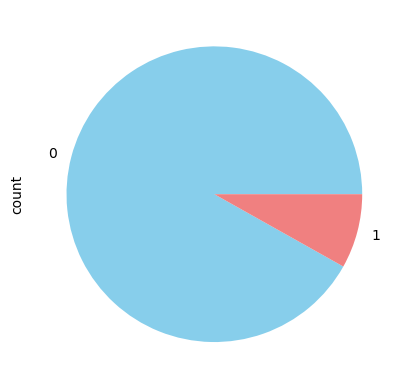

In [63]:
# percentage OF Churn/ Non Churn 
print((churn_filtered['churn'].value_counts()/len(churn))*100)
((churn_filtered['churn'].value_counts()/len(churn))*100).plot(kind="pie", colors=['skyblue', 'lightcoral'])


plt.show()

###### ***As we can see that 93% of the customers do not churn, there is a possibility of class imbalance*** 



In [64]:
# Selecting all the churn phase (_9 Month Columns columns) in order to drop then

churn_phase_cols = [col for col in churn_filtered.columns if '_9' in col]


In [65]:
# Dropping the selected churn phase columns
churn_filtered.drop(churn_phase_cols, axis=1, inplace=True)

# The curent dimension of the dataset after dropping the churn related columns
churn_filtered.shape

(30001, 145)

We can also create new columns for the defining the good phase variables and drop the seperate 6th and 7 month variables.

Before proceding to check the remaining missing value handling, let us check the collineartity of the indepedent variables and try to understand their dependencies.

In [66]:
# creating a list of column names for each month
mon_6_cols = [col for col in churn_filtered.columns if '_6' in col]
mon_7_cols = [col for col in churn_filtered.columns if '_7' in col]
mon_8_cols = [col for col in churn_filtered.columns if '_8' in col]



# 5. Corelation Check



In [67]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones


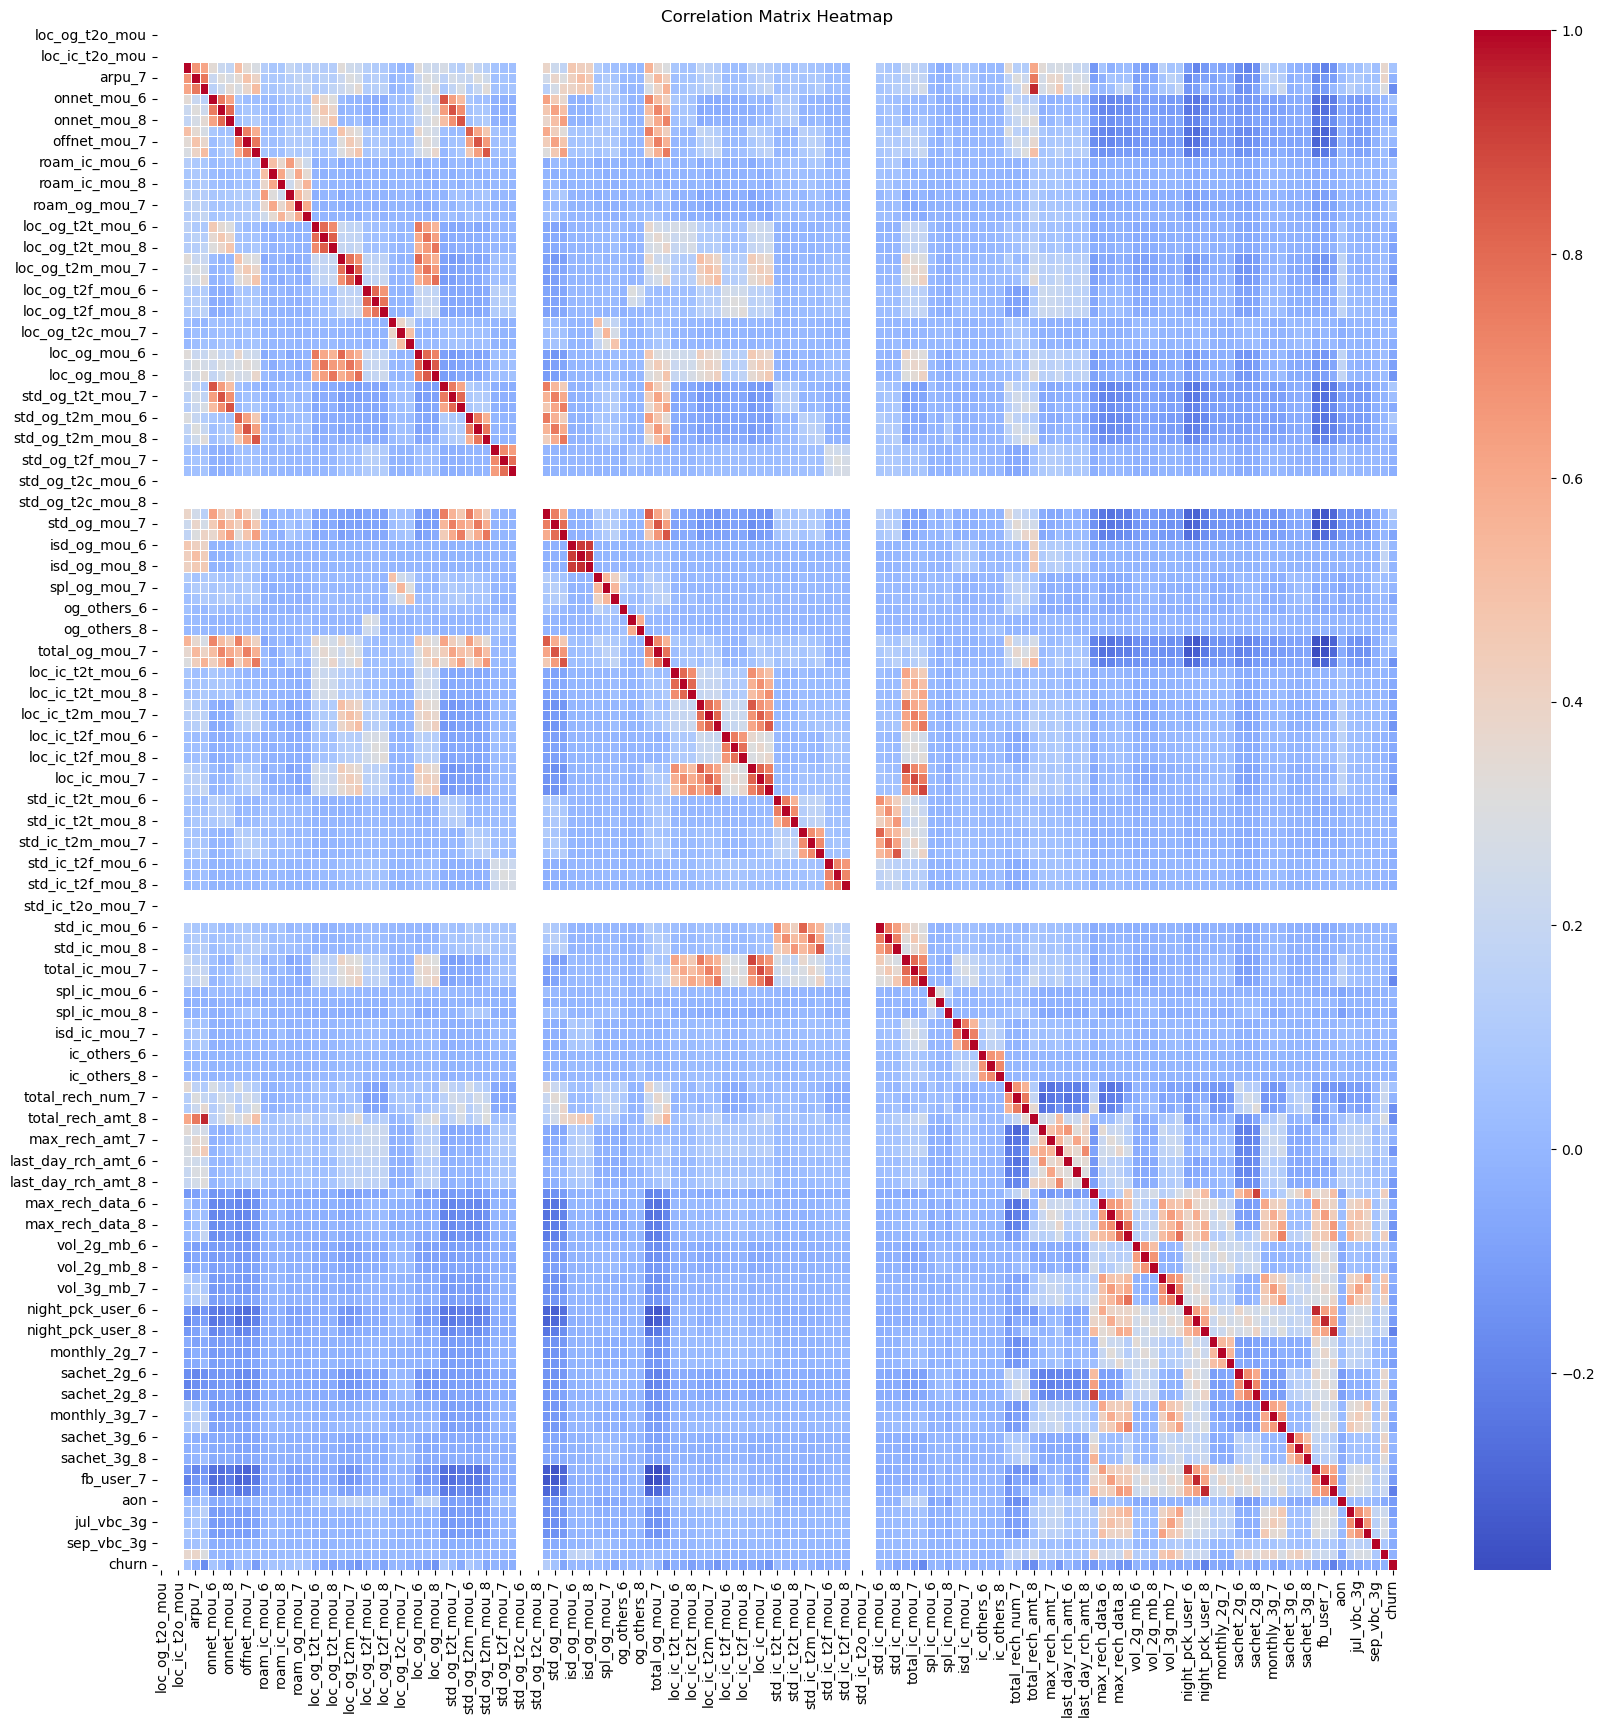

In [68]:
plt.figure(figsize=(20, 20))
churn_corr = churn_filtered.corr()
sns.heatmap(churn_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [69]:

# Compute the correlation matrix
churn_corr = churn_filtered.corr()

# Set the upper triangle of the correlation matrix to zero
churn_corr.loc[:,:] = np.tril(churn_corr, k=-1)

# Stack the correlation matrix to get pairs of correlated variables
churn_corr = churn_corr.stack()

# Filter and sort the correlations that are greater than 0.80 or less than -0.80
high_corr = churn_corr[(churn_corr > 0.80) | (churn_corr < -0.80)].sort_values(ascending=False)

high_corr

fb_user_6           night_pck_user_6     0.956620
fb_user_7           night_pck_user_7     0.956322
total_rech_amt_8    arpu_8               0.955351
fb_user_8           night_pck_user_8     0.954831
isd_og_mou_8        isd_og_mou_7         0.943120
                    isd_og_mou_6         0.918187
isd_og_mou_7        isd_og_mou_6         0.915247
sachet_2g_8         total_rech_data_8    0.900629
total_ic_mou_6      loc_ic_mou_6         0.895069
total_ic_mou_8      loc_ic_mou_8         0.893149
total_ic_mou_7      loc_ic_mou_7         0.883005
std_og_t2t_mou_8    onnet_mou_8          0.860771
std_og_t2t_mou_7    onnet_mou_7          0.860381
std_og_t2t_mou_6    onnet_mou_6          0.859471
std_og_t2m_mou_7    offnet_mou_7         0.855018
std_og_t2m_mou_8    offnet_mou_8         0.851995
total_og_mou_8      std_og_mou_8         0.851063
total_og_mou_7      std_og_mou_7         0.849570
loc_ic_mou_8        loc_ic_t2m_mou_8     0.846955
std_ic_mou_8        std_ic_t2m_mou_8     0.845795


In [70]:
High_Corr_Col=['fb_user_6','fb_user_7','fb_user_8','total_rech_amt_8','isd_og_mou_8',
             'sachet_2g_8','isd_og_mou_8','total_ic_mou_6','total_ic_mou_8','total_ic_mou_7',               
               'std_og_t2t_mou_8','std_og_t2t_mou_7','total_og_mou_8','std_og_t2m_mou_8' ,'total_og_mou_7',
             'std_ic_mou_8','std_og_t2t_mou_6' ,'std_og_t2m_mou_7','std_ic_mou_7',]

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
churn_filtered.drop(High_Corr_Col, axis=1, inplace=True)

In [71]:
# The curent dimension of the dataset after dropping few unwanted columns
churn_filtered.shape

(30001, 127)

In [72]:
churn_filtered.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,AVG_TOTAL_AMOUNT_CALL_DATA_6_7,churn
0,0.0,0.0,0.0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.0,0.0,0.00,65.11,63.685,0.00,3.95,0.00,0.00,0.00,0.0,0.0,0.0,11.64,11.09,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,15.69,15.74,0.16,56.49,57.08,4.13,0.88,0.93,1.15,92.16,92.55,5.44,0.00,0.00,0.00,2.03,2.04,0.00,0.00,0.00,0.00,0.0,0.0,0.0,5.89,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,559.0,1
1,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.910,255.79,49.89,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,4.5,0.0,6.50,0.0,0.0,0.0,487.53,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,1185.0,1
2,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.180,63.04,13.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,3.0,0.0,154.0,23.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,-1.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,696.0,0
3,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.680,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.090,129.74,665.36,0.00,0.00,0.00,0.0,0.0,0.0,763.29,934.69,938.79,0.0,0.00,0.0,0.0,0

# 6. EDA


#### Deriving new variables to understand the data 


In [73]:
# Create a new variable 'tenure_months' by converting 'aon' from days to months
churn_filtered['tenure_months'] = (churn_filtered['aon'] / 30).round(0)

# Remove the original 'aon' column as it has been replaced by 'tenure'
churn_filtered.drop('aon', axis=1, inplace=True)


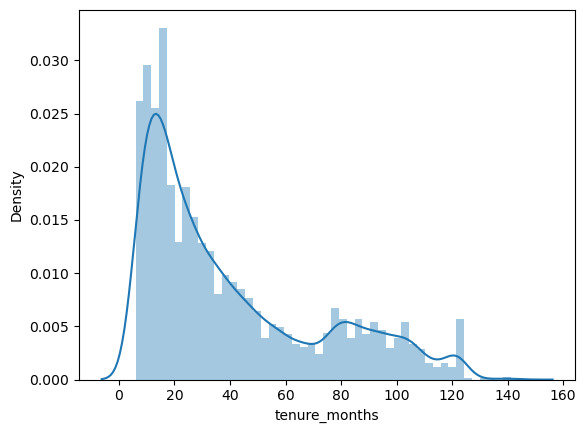

In [74]:
# Checking the distribution of he tenure variable

sns.distplot(churn_filtered['tenure_months'])
plt.show()

We can see that we have more customers with tenure 20 to 40 months 

Having derived the total recharge amount for June and July by combining call recharge amount and data recharge amount into AVG_TOTAL_AMOUNT_CALL_DATA_6_7, we can create bins for this variable and plot it against churn.

In [75]:
churn_filtered['AVG_TOTAL_AMOUNT_CALL_DATA_6_7'].describe()

count    30001.000000
mean      1152.620628
std       1358.713982
min        478.000000
25%        603.000000
50%        800.000000
75%       1208.000000
max      61236.000000
Name: AVG_TOTAL_AMOUNT_CALL_DATA_6_7, dtype: float64

In [76]:
Recharge_range = [0,400,600,800,1000,1200,1500,1600,1800,2000,5000,10000,20000,40000,40001]
Recharge_label = ['0-400','400-600','600-800','800-1000','1000-1200','1200-1500','1500-1600','1600-1800','1800-2000','2000-5000','5000-10000','10000-20000','20000-40000','40000+']
churn_filtered['Total_Recharge_Range_6_7'] = pd.cut(churn_filtered['AVG_TOTAL_AMOUNT_CALL_DATA_6_7'], Recharge_range, labels=Recharge_label)
churn_filtered['Total_Recharge_Range_6_7'].head()

0      400-600
1    1000-1200
2      600-800
3      600-800
4      400-600
Name: Total_Recharge_Range_6_7, dtype: category
Categories (14, object): ['0-400' < '400-600' < '600-800' < '800-1000' ... '5000-10000' < '10000-20000' < '20000-40000' < '40000+']

In [77]:
##### Bar Plot of Total Recharge Range (June & July) vs Churn Count

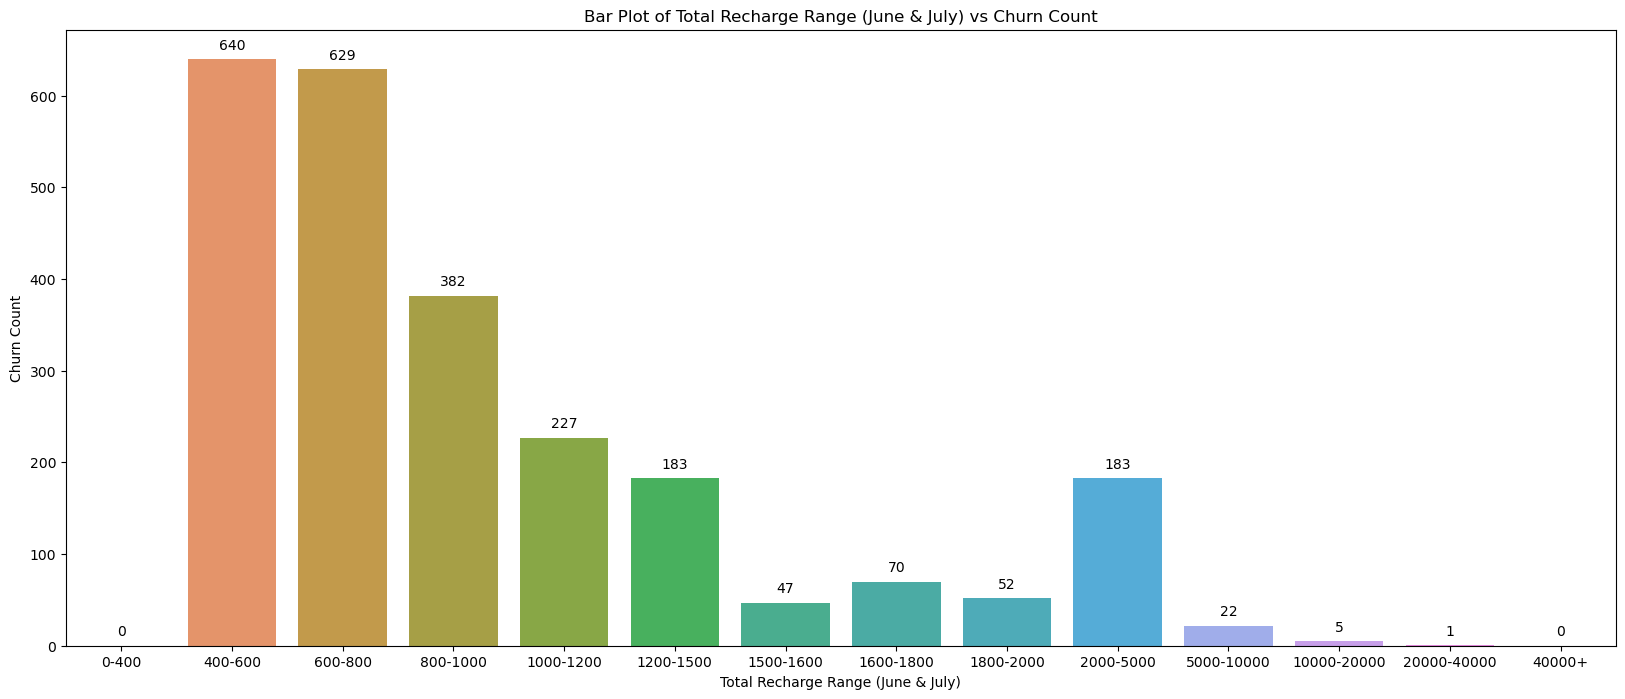

In [78]:

# Count the number of churned customers for each recharge range
churn_counts = churn_filtered[churn_filtered['churn'] == 1]['Total_Recharge_Range_6_7'].value_counts().sort_index()

# Plotting a bar plot for Total_Recharge_Range_6_7 against churn counts
plt.figure(figsize=[20,8])
barplot = sns.barplot(x=churn_counts.index, y=churn_counts.values)

# Adding counts on the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.title('Bar Plot of Total Recharge Range (June & July) vs Churn Count')
plt.xlabel('Total Recharge Range (June & July)')
plt.ylabel('Churn Count')
plt.show()


 We can see the highest number of Churns in lower Range.

In [79]:
##### Bar Plot of Total Recharge Range (June & July) vs Churn Rate

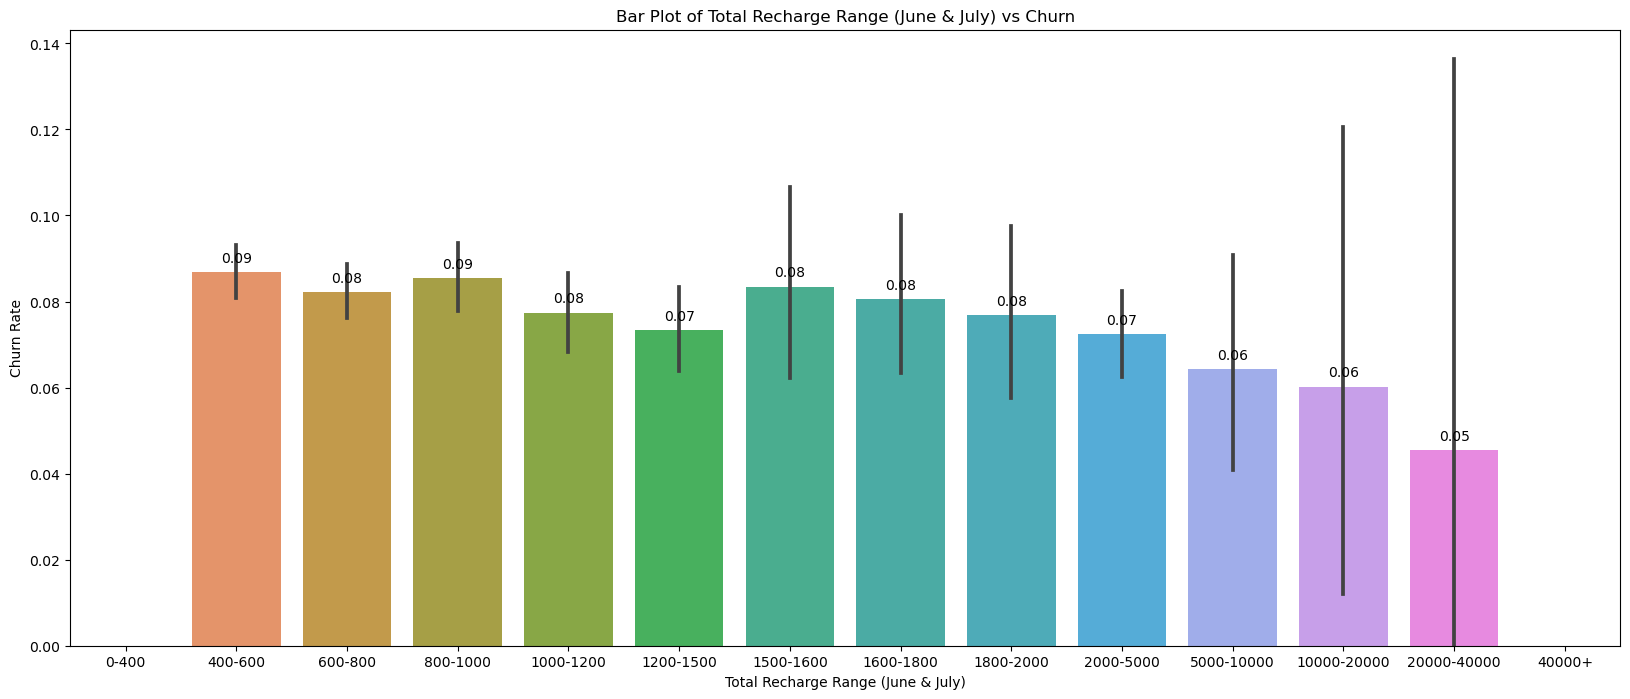

In [80]:

# Plotting a bar plot for Total_Recharge_Range_6_7 against churn
plt.figure(figsize=[20,8])
barplot = sns.barplot(x='Total_Recharge_Range_6_7', y='churn', data=churn_filtered)

# Adding counts on the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.title('Bar Plot of Total Recharge Range (June & July) vs Churn')
plt.xlabel('Total Recharge Range (June & July)')
plt.ylabel('Churn Rate')
plt.show()


We observe that all recharge ranges exhibit similar churn rate proportions. However, customers with a recharge amount in the range of 400 to 600 and 800 to 1000 tend to churn slightly more than others, while those with a recharge amount above 5000 tend to have little less Churn Rate.

In [81]:
tn_range = [0, 12, 24, 48, 96, 97]
tn_label = ['0-12 Months', '1-2 yrs', '2-4 Yrs', '4-8 Yrs', '8 and above']
churn_filtered['tenure_range'] = pd.cut(churn_filtered['tenure_months'], tn_range, labels=tn_label)
churn_filtered['tenure_range'].head()

0        2-4 Yrs
1        2-4 Yrs
2    0-12 Months
3        1-2 yrs
4        1-2 yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-12 Months' < '1-2 yrs' < '2-4 Yrs' < '4-8 Yrs' < '8 and above']

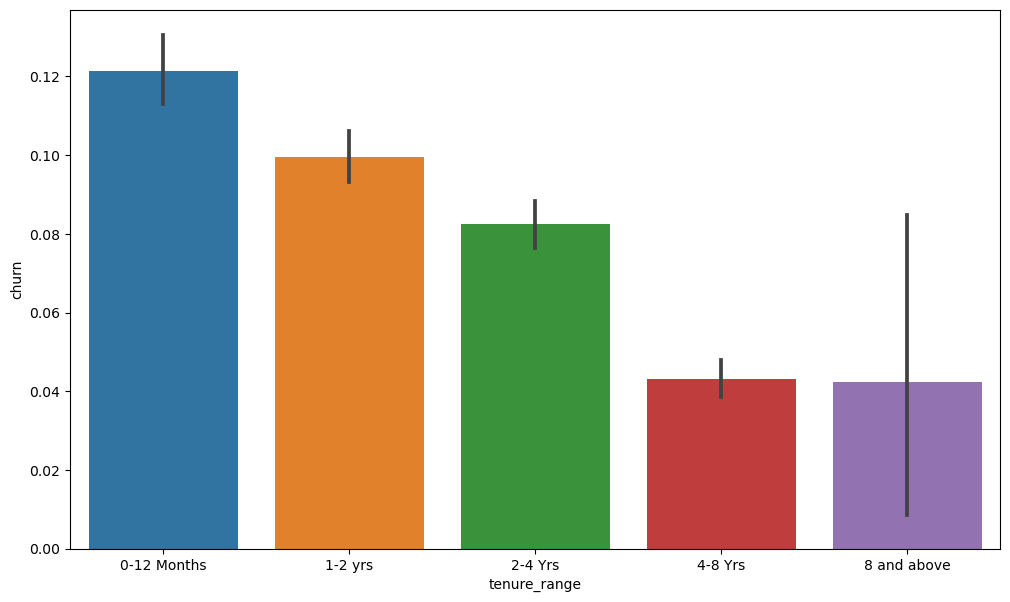

In [82]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=churn_filtered)
plt.show()

We can observe that the highest churn rate occurs within the initial 0-12 months, gradually decreasing as customers remain on the network.

The average revenue per user is good phase of customer is given by arpu_6 and arpu_7. since we have two seperate averages, lets take an average to these two and drop the other columns

In [83]:
churn_filtered["avg_arpu_6_7"]= (churn_filtered['arpu_6']+churn_filtered['arpu_7'])/2
churn_filtered['avg_arpu_6_7'].head()

0     206.1005
1    1209.5150
2     435.4720
3     556.1030
4     134.1235
Name: avg_arpu_6_7, dtype: float64

In [84]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data

churn_filtered.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

# The curent dimension of the dataset after dropping few unwanted columns
churn_filtered.shape

(30001, 128)

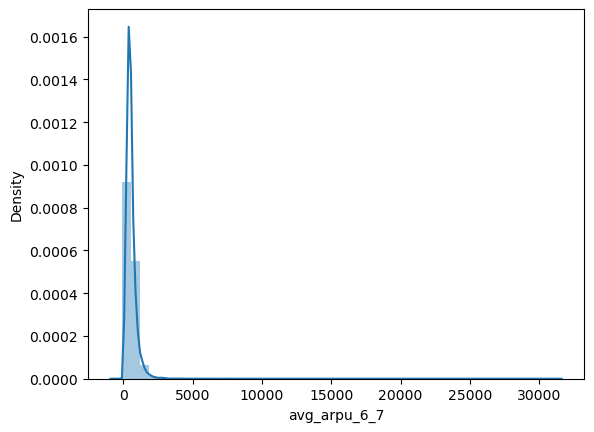

In [85]:
# Visualizing the column created
sns.distplot(churn_filtered['avg_arpu_6_7'])
plt.show()

The majority of the average revenue appears to be below 4000.

In [86]:
churn_filtered.drop(['tenure_range'], axis=1, inplace=True)

In [87]:
churn_filtered.drop(['Total_Recharge_Range_6_7'], axis=1, inplace=True)

In [88]:
churn_filtered.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,AVG_TOTAL_AMOUNT_CALL_DATA_6_7,churn,tenure_months,avg_arpu_6_7
0,0.0,0.0,0.0,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.0,0.0,0.00,65.11,63.685,0.00,3.95,0.00,0.00,0.00,0.0,0.0,0.0,11.64,11.09,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,15.69,15.74,0.16,56.49,57.08,4.13,0.88,0.93,1.15,92.16,92.55,5.44,0.00,0.00,0.00,2.03,2.04,0.00,0.00,0.00,0.00,0.0,0.0,0.0,5.89,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,1,1,1,0,0,0,30.40,0.00,101.20,3.58,559.0,1,32.0,206.1005
1,0.0,0.0,0.0,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.910,255.79,49.89,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,4.5,0.0,6.50,0.0,0.0,0.0,487.53,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,57.74,19.38,18.74,0.00,1185.0,1,27.0,1209.5150
2,0.0,0.0,0.0,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.180,63.04,13.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,3.0,0.0,154.0,23.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,-1.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,21.03,910.65,122.16,0.00,696.0,0,10.0,435.4720
3,0.0,0.0,0.0,637.760,102.41,132.11,85.14,757.93,896.680,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.090,129.74,665.36,0.00,0.00,0.00,0.0,0.0,0.0,763.29,934.69,938.79,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,860.34,2.4

In [89]:
churn_filtered.shape

(30001, 126)

Text(0.5, 1.0, 'Features Correlating with Churn variable')

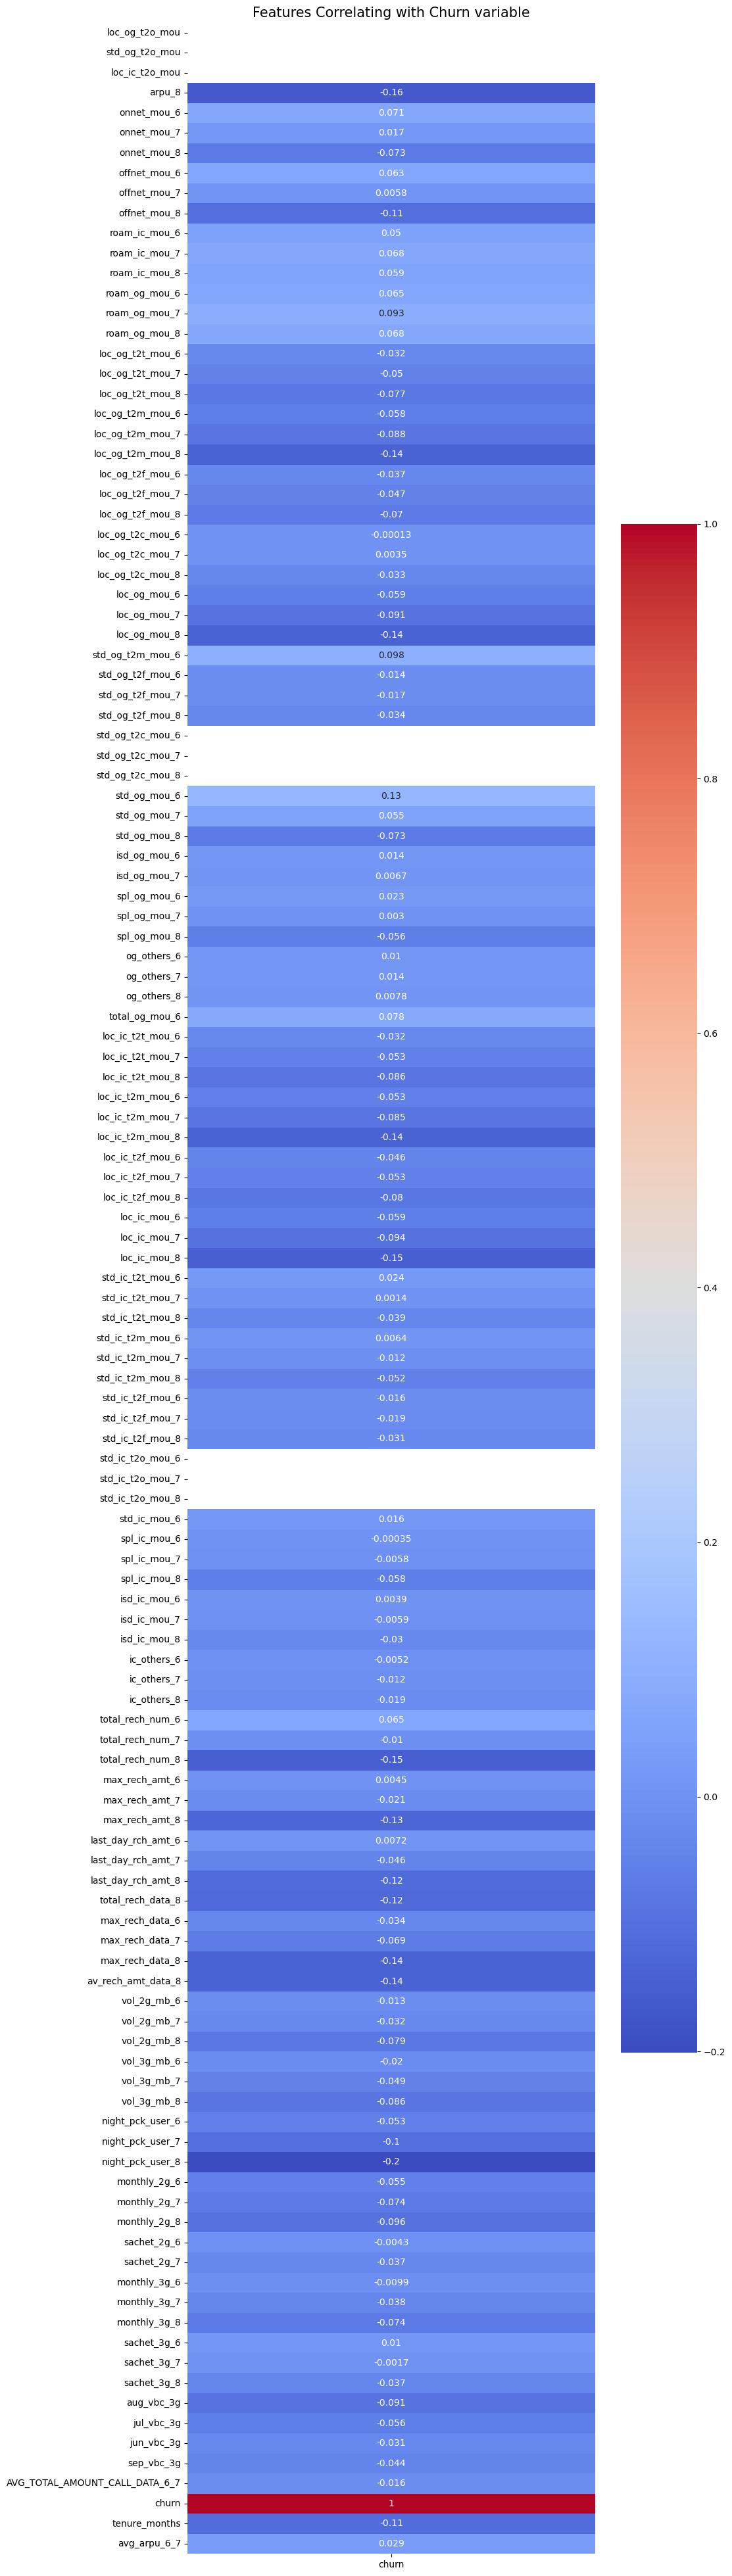

In [90]:
# Checking Correlation between 'churn' variable and other variables in the dataset
plt.figure(figsize=(10, 50))
heatmap_churn = sns.heatmap(churn_filtered.corr()[['churn']], annot=True, cmap='coolwarm')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)


The average number of outgoing calls and calls made while roaming during the 6th and 7th months are positively correlated with churn.


The average revenue and the number of recharges in the 8th month are negatively correlated with churn.

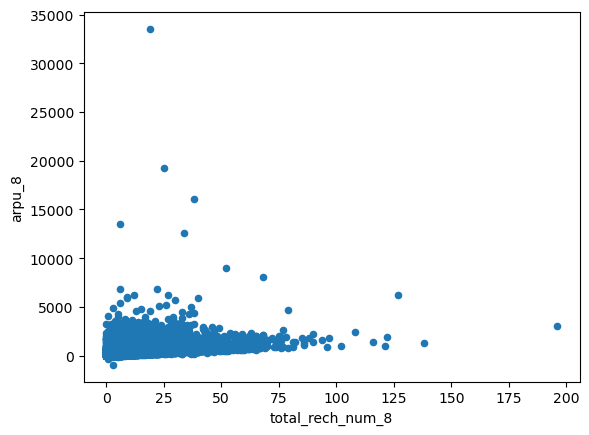

In [91]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
churn_filtered[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

Dropping few derived columns, which are not required in further analysis

In [92]:
churn_filtered.drop(['av_rech_amt_data_8','total_rech_data_8','sachet_2g_6','sachet_2g_7','sachet_3g_6',
              'sachet_3g_7','sachet_3g_8','last_day_rch_amt_6','last_day_rch_amt_7',
              'last_day_rch_amt_8',], axis=1, inplace=True)

now we can drop all "mou related" columns  except onnet and offnet variables

In [93]:
churn_filtered.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
         'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
         'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
         'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
         'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
         'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
         'spl_og_mou_7', 'spl_og_mou_8','total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
         'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
         'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
         'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
         'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7',
         'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',], axis=1, inplace=True)

In [94]:
churn_filtered.shape

(30001, 45)

In [95]:
churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   arpu_8                          30001 non-null  float64
 1   onnet_mou_6                     30001 non-null  float64
 2   onnet_mou_7                     30001 non-null  float64
 3   onnet_mou_8                     30001 non-null  float64
 4   offnet_mou_6                    30001 non-null  float64
 5   offnet_mou_7                    30001 non-null  float64
 6   offnet_mou_8                    30001 non-null  float64
 7   og_others_6                     30001 non-null  float64
 8   og_others_7                     30001 non-null  float64
 9   og_others_8                     30001 non-null  float64
 10  ic_others_6                     30001 non-null  float64
 11  ic_others_7                     30001 non-null  float64
 12  ic_others_8                     

In [96]:
churn_rate = (sum(churn_filtered["churn"])/len(churn_filtered["churn"].index))*100
churn_rate

8.136395453484884

# 7. Split Data Into Train and Test Data  

In [97]:
churn_filtered.shape

(30001, 45)

In [98]:
# dividing data into train and test
X = churn_filtered.drop("churn", axis = 1)
y = churn_filtered.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [99]:
# print shapes of train and test sets
X_train.shape

(22500, 44)

In [100]:
y_train.shape

(22500,)

In [101]:
X_test.shape


(7501, 44)

In [102]:
y_test.shape

(7501,)

# 8. Scaling

In [103]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,AVG_TOTAL_AMOUNT_CALL_DATA_6_7,tenure_months,avg_arpu_6_7
4525,183.004,3.93,0.00,0.00,4.09,0.16,15.46,0.00,0.0,0.0,0.00,0.00,0.00,6,0,3,198,0,198,198.0,0.0,198.0,1916.23,0.0,2902.44,0.00,0.00,0.00,0.0,-1.0,0.0,1,0,1,0,0,0,0.00,0.00,0.0,0.0,610.0,20.0,111.4590
12436,62.260,5.44,11.20,0.00,39.46,11.64,37.74,0.00,0.0,0.0,26.49,12.34,2.01,5,5,6,86,110,0,252.0,252.0,252.0,9.62,65.2,31.10,2068.61,1982.61,3087.72,0.0,0.0,0.0,0,0,0,2,2,2,955.97,1613.36,735.4,0.0,1106.0,11.0,93.4050
29024,24.750,725.11,671.44,11.76,145.63,80.66,2.50,2.33,0.0,0.0,0.13,0.26,0.00,9,6,2,128,150,0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0.00,0.00,0.0,0.0,697.0,10.0,523.5985
11193,422.360,17.93,37.53,23.89,526.68,831.58,671.01,0.00,0.0,0.0,0.00,10.73,0.00,39,46,32,50,47,47,17.0,0.0,0.0,62.01,0.0,0.00,0.00,0.00,0.00,0.0,-1.0,-1.0,0,0,0,0,0,0,0.00,0.00,0.0,0.0,572.5,28.0,487.7310
10907,2300.151,7.53,11.88,56.49,788.53,1441.28,5453.33,0.98,0.0,0.0,0.00,0.00,0.00,4,8,27,120,130,130,0.0,0.0,17.0,0.00,0.0,58.26,0.00,0.00,0.00,-1.0,-1.0,0.0,0,0,0,0,0,0,0.00,0.00,0.0,0.0,548.0,81.0,497.1310


In [104]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22500 entries, 4525 to 22754
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   arpu_8                          22500 non-null  float64
 1   onnet_mou_6                     22500 non-null  float64
 2   onnet_mou_7                     22500 non-null  float64
 3   onnet_mou_8                     22500 non-null  float64
 4   offnet_mou_6                    22500 non-null  float64
 5   offnet_mou_7                    22500 non-null  float64
 6   offnet_mou_8                    22500 non-null  float64
 7   og_others_6                     22500 non-null  float64
 8   og_others_7                     22500 non-null  float64
 9   og_others_8                     22500 non-null  float64
 10  ic_others_6                     22500 non-null  float64
 11  ic_others_7                     22500 non-null  float64
 12  ic_others_8                     22

In [105]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [106]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [107]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,AVG_TOTAL_AMOUNT_CALL_DATA_6_7,tenure_months,avg_arpu_6_7
4525,0.032729,0.000561,0.000000,0.000000,0.000587,0.000017,0.001104,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.019544,0.000000,0.015306,0.049377,0.000000,0.044504,0.127331,0.000000,0.127331,0.186297,0.000000,0.261067,0.00000,0.000000,0.0000,0.5,0.0,0.5,0.25,0.0,0.2,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.0,0.003540,0.101449,0.026756
12436,0.029228,0.000776,0.001511,0.000000,0.005668,0.001204,0.002694,0.000000,0.0,0.0,0.019708,0.008249,0.001661,0.016287,0.036232,0.030612,0.021446,0.027431,0.000000,0.162058,0.162058,0.162058,0.000935,0.008281,0.002797,0.04523,0.070445,0.1028,0.5,0.5,0.5,0.00,0.0,0.0,0.142857,0.125,0.125,0.074013,0.176023,0.065859,0.0,0.016843,0.036232,0.026196
29024,0.028141,0.103423,0.090600,0.001639,0.020916,0.008344,0.000178,0.033045,0.0,0.0,0.000097,0.000174,0.000000,0.029316,0.043478,0.010204,0.031920,0.037406,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.0,0.005874,0.028986,0.039560
11193,0.039669,0.002557,0.005064,0.003330,0.075646,0.086021,0.047904,0.000000,0.0,0.0,0.000000,0.007173,0.000000,0.127036,0.333333,0.163265,0.012469,0.011721,0.010564,0.010932,0.000000,0.000000,0.006029,0.000000,0.000000,0.00000,0.000000,0.0000,0.5,0.0,0.0,0.00,0.0,0.0,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.0,0.002535,0.159420,0.038446
10907,0.094115,0.001074,0.001603,0.007874,0.113255,0.149091,0.389319,0.013899,0.0,0.0,0.000000,0.000000,0.000000,0.013029,0.057971,0.137755,0.029925,0.032419,0.029220,0.000000,0.000000,0.010932,0.000000,0.000000,0.005240,0.00000,0.000000,0.0000,0.0,0.0,0.5,0.00,0.0,0.0,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.0,0.001877,0.543478,0.038738


As there are many variables which we will start the process of dropping variables after doing the RFE

# Data Modeling and Model Evaluation and Prepare Model for Predictor variables selection

# 9. Data Imbalance Handling


In [108]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [109]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (41338, 44)
Dimension of y_train_sm Shape: (41338,)


# 10. Logistic Regression

### Model -With all Colmns

In [110]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [111]:
## Creating Logistic regression model using all Columns

In [112]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41293
Model Family:                Binomial   Df Model:                           44
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 11 Jun 2024   Deviance:                       38351.
Time:                        16:48:08   Pearson chi2:                 5.86e+08
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              1.0885      0.071     15.361      0.000       0.950       1.227
arpu_8                           -20.1107      2.977     -6.756      0.000     -25.945     -14.276
onnet_mou_6                        1.2649      0.347      3.648      0.000       0.585       1.945
onnet_mou_7                        2.3448      0.483      4.857      0.000       1.399       3.291
onnet_mou_8                       -5.9467      0.532    -11.186      0.000      -6.989      -4.905
offnet_mou_6                       0.8685      0.345      2.517      0.012       0.192       1.545
offnet_mou_7                       5.6690      0.622      9.113      0.000       4.450       6.888
offnet_mou_8                     -27.2134      1.224    -22.234      0.000     -29.612     -24.814
og_others_6                       -3.4939      0.514     -6.798      0.000      -4.501      -2.487
og_others_7                       -2.9069      5.147     -0.565      0.572     -12.994       7.180
og_others_8                    -1828.3374    848.332     -2.155      0.031   -3491.037    -165.637
ic_others_6                      -15.6275      4.799     -3.256      0.001     -25.034      -6.221
ic_others_7                        2.2211      2.580      0.861      0.389      -2.835       7.278
ic_others_8                      -27.9897      4.801     -5.830      0.000     -37.399     -18.580
total_rech_num_6                   5.2672      0.786      6.702      0.000       3.727       6.808
total_rech_num_7                   4.2748      0.425     10.068      0.000       3.443       5.107
total_rech_num_8                 -20.4166      0.747    -27.329      0.000     -21.881     -18.952
max_rech_amt_6                     0.9232      0.425      2.174      0.030       0.091       1.755
max_rech_amt_7                     2.0273      0.367      5.517      0.000       1.307       2.747
max_rech_amt_8                    -4.8095      0.574     -8.374      0.000      -5.935      -3.684
max_rech_data_6                    0.2810      0.383      0.733      0.463      -0.470       1.032
max_rech_data_7                    2.4179      0.413      5.852      0.000       1.608       3.228
max_rech_data_8                   -0.7227      0.513     -1.409      0.159      -1.728       0.283
vol_2g_mb_6                        2.3731      0.662      3.584      0.000       1.075       3.671
vol_2g_mb_7                        4.1350      0.600      6.895      0.000       2.960       5.310
vol_2g_mb_8                      -13.7903      1.259    -10.955      0.000     -16.257     -11.323
vol_3g_mb_6                        5.7977      1.533      3.782      0.000       2.793       8.802
vol_3g_mb_7                        2.3404      1.125      2.080      0.038       0.135       4.546
vol_3g_mb_8   

# 11. Logistic Regression using Feature Selection (RFE method)

In [113]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 15 variables as output
rfe = RFE(logreg,  n_features_to_select= 15)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [114]:
#checking the output of RFE
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', False, 4),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 13),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('og_others_6', False, 10),
 ('og_others_7', False, 27),
 ('og_others_8', False, 24),
 ('ic_others_6', False, 17),
 ('ic_others_7', False, 19),
 ('ic_others_8', False, 5),
 ('total_rech_num_6', True, 1),
 ('total_rech_num_7', True, 1),
 ('total_rech_num_8', True, 1),
 ('max_rech_amt_6', False, 16),
 ('max_rech_amt_7', False, 14),
 ('max_rech_amt_8', True, 1),
 ('max_rech_data_6', False, 20),
 ('max_rech_data_7', False, 8),
 ('max_rech_data_8', False, 23),
 ('vol_2g_mb_6', False, 18),
 ('vol_2g_mb_7', False, 11),
 ('vol_2g_mb_8', True, 1),
 ('vol_3g_mb_6', False, 9),
 ('vol_3g_mb_7', False, 21),
 ('vol_3g_mb_8', False, 2),
 ('night_pck_user_6', False, 28),
 ('night_pck_user_7', False, 25),
 ('night_pck_user_8', False, 12),
 ('monthly_2g_6', False, 22),
 ('monthly_2g_7', False, 6),
 ('monthly_2g_8', 

In [115]:
# columns which are selected by RFE

In [116]:
rfe_col = X_train_sm.columns[rfe.support_]
rfe_col

Index(['arpu_8', 'onnet_mou_6', 'onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'max_rech_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'monthly_3g_8',
       'aug_vbc_3g', 'sep_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')

In [117]:
# columns which are not selected by RFE

In [118]:
X_train.columns[~rfe.support_]

Index(['onnet_mou_7', 'offnet_mou_6', 'og_others_6', 'og_others_7',
       'og_others_8', 'ic_others_6', 'ic_others_7', 'ic_others_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_3g_6', 'monthly_3g_7', 'jul_vbc_3g', 'jun_vbc_3g',
       'AVG_TOTAL_AMOUNT_CALL_DATA_6_7', 'tenure_months'],
      dtype='object')

### Model-1 with RFE selected columns

In [119]:
X_train_SM = sm.add_constant(X_train_sm[rfe_col])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41322
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20257.
Date:                Tue, 11 Jun 2024   Deviance:                       40514.
Time:                        16:48:16   Pearson chi2:                 1.14e+10
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3338
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6417      0.056     11.537      0.000       0.533       0.751
arpu_8             -33.5362      2.731    -12.281      0.000     -38.888     -28.184
onnet_mou_6          1.4677      0.280      5.235      0.000       0.918       2.017
onnet_mou_8         -3.0029      0.389     -7.724      0.000      -3.765      -2.241
offnet_mou_7         5.6712      0.527     10.751      0.000       4.637       6.705
offnet_mou_8       -26.0397      1.190    -21.873      0.000     -28.373     -23.706
total_rech_num_6     5.6793      0.653      8.703      0.000       4.400       6.958
total_rech_num_7     4.2972      0.356     12.062      0.000       3.599       4.995
total_rech_num_8   -23.7560      0.713    -33.304      0.000     -25.154     -22.358
max_rech_amt_8      -5.1749      0.502    -10.305      0.000      -6.159      -4.191
vol_2g_mb_8        -15.9620      1.076    -14.829      0.000     -18.072     -13.852
monthly_2g_8        -6.8953      0.307    -22.442      0.000      -7.498      -6.293
monthly_3g_8        -5.2244      0.571     -9.152      0.000      -6.343      -4.106
aug_vbc_3g         -11.6303      0.873    -13.323      0.000     -13.341      -9.919
sep_vbc_3g         -53.4669      4.179    -12.794      0.000     -61.658     -45.276
avg_arpu_6_7        41.1060      2.240     18.354      0.000      36.717      45.495
====================================================================================
"""

#### Checking for VIF

In [120]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_SM[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train_SM[rfe_col].values, i) for i in range(X_train_SM[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,37.53
14,avg_arpu_6_7,34.45
6,total_rech_num_7,6.64
7,total_rech_num_8,5.21
5,total_rech_num_6,5.15
3,offnet_mou_7,4.12
4,offnet_mou_8,3.93
8,max_rech_amt_8,2.42
1,onnet_mou_6,2.36
2,onnet_mou_8,2.15


### Model-2 after Removing arpu_8

In [121]:
# Removing arpu_8 column 
log_cols = rfe_col.to_list()
log_cols.remove('arpu_8')
print(log_cols)

['onnet_mou_6', 'onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'max_rech_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'monthly_3g_8', 'aug_vbc_3g', 'sep_vbc_3g', 'avg_arpu_6_7']


In [122]:
X_train_SM = sm.add_constant(X_train_sm[log_cols])
logm3 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41323
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20330.
Date:                Tue, 11 Jun 2024   Deviance:                       40660.
Time:                        16:48:17   Pearson chi2:                 4.98e+10
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3315
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2209      0.056      3.945      0.000       0.111       0.331
onnet_mou_6          2.3117      0.273      8.477      0.000       1.777       2.846
onnet_mou_8         -4.7949      0.366    -13.111      0.000      -5.512      -4.078
offnet_mou_7         7.5500      0.508     14.859      0.000       6.554       8.546
offnet_mou_8       -32.2457      1.096    -29.414      0.000     -34.394     -30.097
total_rech_num_6     7.2088      0.646     11.158      0.000       5.943       8.475
total_rech_num_7     4.4774      0.357     12.552      0.000       3.778       5.177
total_rech_num_8   -26.8947      0.673    -39.981      0.000     -28.213     -25.576
max_rech_amt_8      -7.5738      0.483    -15.680      0.000      -8.520      -6.627
vol_2g_mb_8        -16.3361      1.082    -15.093      0.000     -18.458     -14.215
monthly_2g_8        -7.1695      0.305    -23.473      0.000      -7.768      -6.571
monthly_3g_8        -6.1972      0.559    -11.082      0.000      -7.293      -5.101
aug_vbc_3g         -11.6954      0.869    -13.452      0.000     -13.399      -9.991
sep_vbc_3g         -55.1778      4.215    -13.091      0.000     -63.439     -46.917
avg_arpu_6_7        24.0900      1.725     13.965      0.000      20.709      27.471
====================================================================================
"""

In [123]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_SM[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_SM[log_cols].values, i) for i in range(X_train_SM[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_rech_num_7,6.64
13,avg_arpu_6_7,6.62
4,total_rech_num_6,5.06
6,total_rech_num_8,4.62
2,offnet_mou_7,3.62
3,offnet_mou_8,3.22
7,max_rech_amt_8,2.23
0,onnet_mou_6,2.17
1,onnet_mou_8,1.95
11,aug_vbc_3g,1.62


We can see that P Value are below the accepted threshold of 0.05 , but VIF value of 'avg_arpu_6_7' are much above the threshold value of 5.00 hence Droping the Column

### Model-3 after Removing avg_arpu_6_7

In [124]:
# Removing avg_arpu_6_7 column
log_cols.remove('avg_arpu_6_7')

In [125]:
X_train_SM = sm.add_constant(X_train_sm[log_cols])
logm4 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41324
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20443.
Date:                Tue, 11 Jun 2024   Deviance:                       40885.
Time:                        16:48:19   Pearson chi2:                 1.00e+11
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3278
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.9070      0.028     32.817      0.000       0.853       0.961
onnet_mou_6          3.3647      0.263     12.804      0.000       2.850       3.880
onnet_mou_8         -4.6222      0.367    -12.607      0.000      -5.341      -3.904
offnet_mou_7         9.6347      0.492     19.600      0.000       8.671      10.598
offnet_mou_8       -31.8750      1.094    -29.141      0.000     -34.019     -29.731
total_rech_num_6     9.2180      0.642     14.363      0.000       7.960      10.476
total_rech_num_7     4.8085      0.359     13.408      0.000       4.106       5.511
total_rech_num_8   -27.6269      0.675    -40.959      0.000     -28.949     -26.305
max_rech_amt_8      -5.0356      0.441    -11.407      0.000      -5.901      -4.170
vol_2g_mb_8        -17.1263      1.096    -15.631      0.000     -19.274     -14.979
monthly_2g_8        -7.2636      0.306    -23.769      0.000      -7.863      -6.665
monthly_3g_8        -6.0535      0.563    -10.751      0.000      -7.157      -4.950
aug_vbc_3g         -11.2330      0.868    -12.947      0.000     -12.934      -9.532
sep_vbc_3g         -54.2543      4.199    -12.922      0.000     -62.483     -46.025
====================================================================================
"""

In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_SM[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_SM[log_cols].values, i) for i in range(X_train_SM[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_rech_num_7,6.47
6,total_rech_num_8,4.62
4,total_rech_num_6,4.22
2,offnet_mou_7,3.39
3,offnet_mou_8,3.22
0,onnet_mou_6,2.02
1,onnet_mou_8,1.95
7,max_rech_amt_8,1.71
11,aug_vbc_3g,1.62
10,monthly_3g_8,1.53


##### We have finaly Achived the Final Model with VIF and P valued below Threshold Value

## 12. Getting the predicted values on the train set

In [127]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([4.00284915e-03, 2.10486462e-01, 8.20470282e-01, 1.69695908e-01,
       1.07557583e-06, 3.06564037e-01, 9.77616589e-02, 2.94196987e-06,
       4.92019610e-01, 1.73626359e-01])

# 13. Creating a dataframe with the actual churn flag and the predicted probabilities

In [128]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.004003
1,0,0.210486
2,1,0.820470
3,0,0.169696
4,0,0.000001


In [129]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.004003,0
1,0,0.210486,0
2,1,0.820470,1
3,0,0.169696,0
4,0,0.000001,0


# 14. Confusion matrix 

In [130]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[15542  5127]
 [ 3860 16809]]


#### Confusion matrix

#### Predicted     not_churn    churn
#### Actual

#### not_churn     15547             5122
                    
#### churn             3879             16790  

# 15. Accuracy/Sensitivity/Specificity/FPR/Precision/True Negative Prediction 

In [131]:
# Checking the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

Accuracy : 0.7825971261309207


In [132]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [133]:
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8132468914799942


In [134]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7519473607818472


In [135]:
# false postive rate 
print(FP/ float(TN+FP))

0.2480526392181528


In [136]:
# positive predictive value 
print (TP / float(TP+FP))

0.7662746170678337


In [137]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8010514379960829


# 16. ROC Curve

In [138]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [139]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

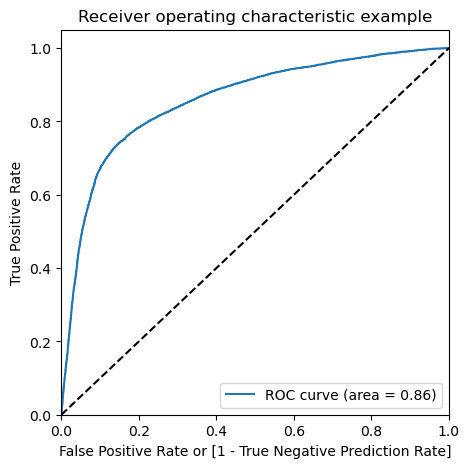

In [140]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

In [141]:
# The area under ROC curve is 0.86

# 17. Finding Optimal Cutoff Point

In [142]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.004003,0,1,0,0,0,0,0,0,0,0,0
1,0,0.210486,0,1,1,1,0,0,0,0,0,0,0
2,1,0.820470,1,1,1,1,1,1,1,1,1,1,0
3,0,0.169696,0,1,1,0,0,0,0,0,0,0,0
4,0,0.000001,0,1,0,0,0,0,0,0,0,0,0


In [143]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.604770     0.972519     0.237022
0.2          0.2  0.663602     0.946635     0.380570
0.3          0.3  0.712589     0.914800     0.510378
0.4          0.4  0.752721     0.871160     0.634283
0.5          0.5  0.782597     0.813247     0.751947
0.6          0.6  0.796289     0.737723     0.854855
0.7          0.7  0.757971     0.590885     0.925057
0.8          0.8  0.650249     0.330930     0.969568
0.9          0.9  0.551913     0.113842     0.989985


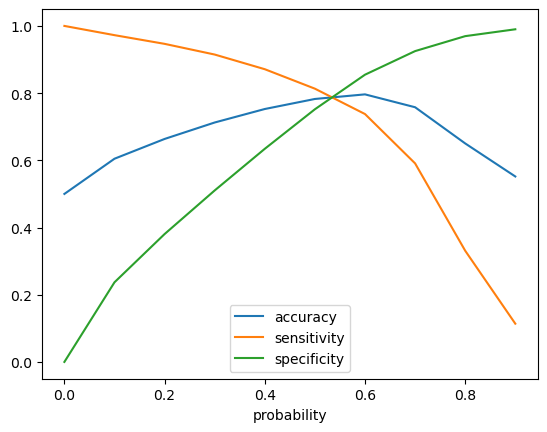

In [144]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [145]:
# We can refine our cutoffs probablity 

In [146]:
 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.004003,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.210486,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0.820470,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
3,0,0.169696,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.000001,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [147]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix


num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.782597     0.813247     0.751947
0.51         0.51  0.785161     0.806570     0.763752
0.52         0.52  0.787871     0.800087     0.775654
0.53         0.53  0.789346     0.791814     0.786879
0.54         0.54  0.791257     0.784460     0.798055
0.55         0.55  0.793072     0.777735     0.808409
0.56         0.56  0.794305     0.770139     0.818472
0.57         0.57  0.794959     0.762398     0.827519
0.58         0.58  0.794426     0.752093     0.836760
0.59         0.59  0.795830     0.745367     0.846292


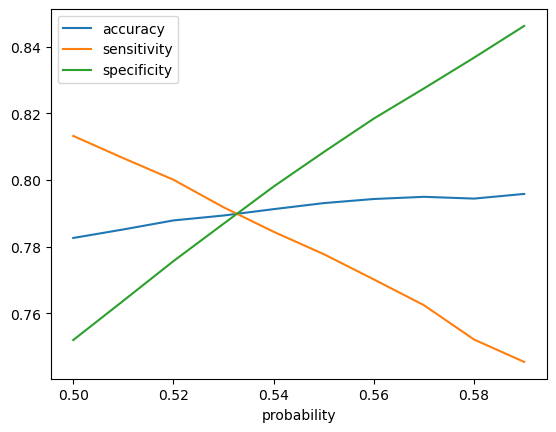

In [148]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

 #### From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.53

# 18. Taking Optimum point as 0.53 as cutoff Probability

In [149]:
#### From the curve above,we can take 0.53 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.004003,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.210486,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0.820470,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
3,0,0.169696,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.000001,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 19. For New Cut Off (0.53) Calculate Accuracy/Sensitivity/Specificity/FPR/Precision/True Negative Prediction 

In [150]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.78934636412018


In [151]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[16264  4405]
 [ 4303 16366]]


In [152]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.791813827471092
Specificity =  0.786878900769268
False Positive Rate =  0.21312109923073203
Precision =  0.7879254730152616
True Negative Prediction Rate =  0.7907813487625809


# 20. Precision and recall tradeoff

In [153]:
from sklearn.metrics import precision_recall_curve

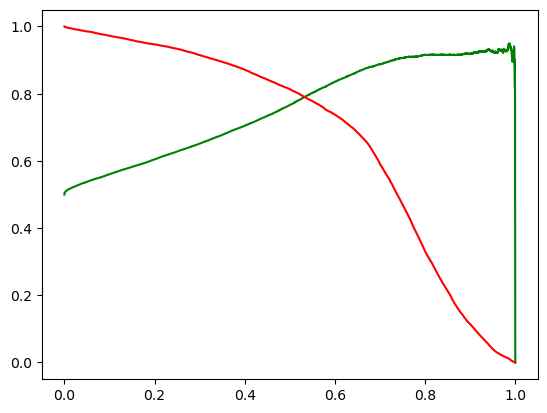

In [154]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# 21. Making predictions on the test data


In [155]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,AVG_TOTAL_AMOUNT_CALL_DATA_6_7,tenure_months,avg_arpu_6_7
16575,0.046455,0.000000,0.001074,0.000000,0.000000,0.011408,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.022801,0.072464,0.015306,0.062843,0.062843,0.056642,0.162058,0.162058,0.162058,0.001785,0.006578,0.002816,0.163451,0.159254,0.092118,0.5,0.5,0.5,0.0,0.0,0.0,0.428571,0.3750,0.1875,0.160223,0.217613,0.412013,0.000000,0.256300,0.094203,0.049051
10086,0.044771,0.075774,0.067489,0.068323,0.009290,0.007710,0.005207,0.000000,0.0,0.0,0.000439,0.000201,0.0,0.013029,0.014493,0.015306,0.074813,0.087282,0.089908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000228,0.268116,0.035274
18646,0.042529,0.136566,0.114743,0.149345,0.001090,0.002716,0.001079,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.016287,0.036232,0.025510,0.124688,0.084539,0.112385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.000000,0.000000,0.000181,0.000000,0.000040,0.565217,0.034930
10925,0.027401,0.000000,0.000000,0.000367,0.001958,0.000000,0.000843,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.016287,0.028986,0.010204,0.062843,0.062843,0.000000,0.162058,0.162058,0.000000,0.003546,0.000170,0.000000,0.079117,0.037413,0.000000,0.5,0.5,0.0,0.0,0.0,0.0,0.214286,0.0625,0.0000,0.000000,0.000000,0.092829,0.000000,0.031112,0.036232,0.033257
24503,0.044181,0.000548,0.013906,0.014724,0.113417,0.107065,0.052672,0.087789,0.0,0.0,0.001518,0.000000,0.0,0.052117,0.173913,0.091837,0.012469,0.012469,0.009890,0.000000,0.010932,0.000000,0.000000,0.000434,0.000000,0.000000,0.000000,0.000000,0.0,0.5,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.069046,0.005686,0.224638,0.041169


In [156]:
# Feature selection - We will use selected Columns in Test Data
X_test=X_test[log_cols]
X_test.head()

,onnet_mou_6,onnet_mou_8,offnet_mou_7,offnet_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_8,vol_2g_mb_8,monthly_2g_8,monthly_3g_8,aug_vbc_3g,sep_vbc_3g
16575,0.000000,0.000000,0.011408,0.000000,0.022801,0.072464,0.015306,0.056642,0.002816,0.0,0.1875,0.160223,0.000000
10086,0.075774,0.068323,0.007710,0.005207,0.013029,0.014493,0.015306,0.089908,0.000000,0.0,0.0000,0.000000,0.000000
18646,0.136566,0.149345,0.002716,0.001079,0.016287,0.036232,0.025510,0.112385,0.000000,0.0,0.0000,0.000000,0.000000
10925,0.000000,0.000367,0.000000,0.000843,0.016287,0.028986,0.010204,0.000000,0.000000,0.0,0.0000,0.000000,0.000000
24503,0.000548,0.014724,0.107065,0.052672,0.052117,0.173913,0.091837,0.009890,0.000000,0.0,0.0000,0.000000,0.069046


In [157]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

In [158]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 16575    0.107593
10086    0.517162
18646    0.430864
10925    0.708077
24503    0.007979
10584    0.237126
2654     0.164938
23565    0.750420
5876     0.498008
19698    0.018653
dtype: float64


In [159]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
16575,0.107593
10086,0.517162
18646,0.430864
10925,0.708077
24503,0.007979


In [160]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

## 22. Creating a dataframe with the actual churn flag and the predicted probabilities in Test Data set

In [161]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
16575,0
10086,0
18646,0
10925,1
24503,0


In [162]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
16575,0,0.107593
10086,0,0.517162
18646,0,0.430864
10925,1,0.708077
24503,0,0.007979


In [163]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
16575,0,0.107593,0
10086,0,0.517162,0
18646,0,0.430864,0
10925,1,0.708077,1
24503,0,0.007979,0


# 23. Test Data - Accuracy/Sensitivity/Specificity/FPR/Precision/True Negative Prediction 

In [164]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.7954939341421143

In [165]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[5496 1395]
 [ 139  471]]


In [166]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [167]:
# Display the sensitivity of the logistic regression model
print("Sensitivity =", TP3 / float(TP3 + FN3))

# Calculate and display specificity
print("Specificity =", TN3 / float(TN3 + FP3))

# Calculate and display the false positive rate (predicting churn when the customer has not churned)
print("False Positive Rate =", FP3 / float(TN3 + FP3))

# Calculate and display precision (positive predictive value)
print("Precision =", TP3 / float(TP3 + FP3))

# Calculate and display the true negative prediction rate (negative predictive value)
print("True Negative Prediction Rate =", TN3 / float(TN3 + FN3))


Sensitivity = 0.7721311475409836
Specificity = 0.7975620374401393
False Positive Rate = 0.20243796255986068
Precision = 0.25241157556270094
True Negative Prediction Rate = 0.9753327417923692


# 24. ROC Curve (Test Data Set)

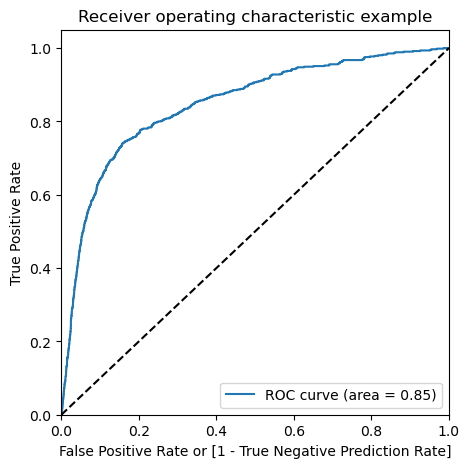

In [168]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

In [169]:
# The area under ROC curve is 0.85

# 25. PCA

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=10)

In [171]:
X_train.shape

(24000, 44)

In [172]:
from sklearn.decomposition import PCA

In [173]:
pca = PCA(random_state=42)

In [174]:
pca.fit(X_train)

PCA(random_state=42)

In [175]:
pca.components_

array([[ 7.90877494e-02, -1.87235099e-02, -2.01989076e-02, ...,
         6.49675452e-01, -4.58726162e-04,  8.07137226e-02],
       [ 2.18721478e-01,  1.30560911e-01,  1.48111401e-01, ...,
         6.19475222e-01, -9.09186393e-04,  2.37287686e-01],
       [-3.35385450e-01, -1.88833241e-01, -2.35010035e-01, ...,
         3.96716363e-01, -1.57257946e-03, -2.55072368e-01],
       ...,
       [ 4.72142435e-05,  5.46881271e-06, -3.02391921e-05, ...,
        -1.01943023e-05, -5.99383713e-05, -2.57886964e-05],
       [ 1.98888657e-05, -1.42473494e-05,  2.36734411e-05, ...,
        -5.55028257e-06,  5.08853493e-05, -8.36676881e-06],
       [-1.74143009e-04, -2.30927549e-05, -1.55185127e-05, ...,
         1.72303212e-05,  5.02776732e-06,  1.47453912e-04]])

### Analysing the explained variance ratio

In [176]:
pca.explained_variance_ratio_

array([4.38872420e-01, 1.58673012e-01, 9.36419543e-02, 6.95214345e-02,
       4.57656489e-02, 3.44530955e-02, 3.34623591e-02, 2.68510264e-02,
       2.33453742e-02, 1.59440244e-02, 1.00524427e-02, 7.53117397e-03,
       6.97249112e-03, 6.48111032e-03, 5.96176966e-03, 4.87144631e-03,
       4.68436582e-03, 4.12165227e-03, 2.36579237e-03, 2.10617119e-03,
       1.52873474e-03, 1.44135445e-03, 4.22657498e-04, 3.64438172e-04,
       3.05343324e-04, 1.32685959e-04, 7.79217320e-05, 1.72522141e-05,
       1.11232572e-05, 8.46041156e-06, 3.49249111e-06, 2.72511330e-06,
       2.39578399e-06, 1.92703533e-06, 5.21383701e-07, 6.94375982e-08,
       3.88865374e-08, 2.63016756e-08, 1.71633118e-08, 1.49269728e-08,
       1.06619235e-08, 8.77634529e-09, 7.60502902e-09, 7.13928368e-09])

In [177]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

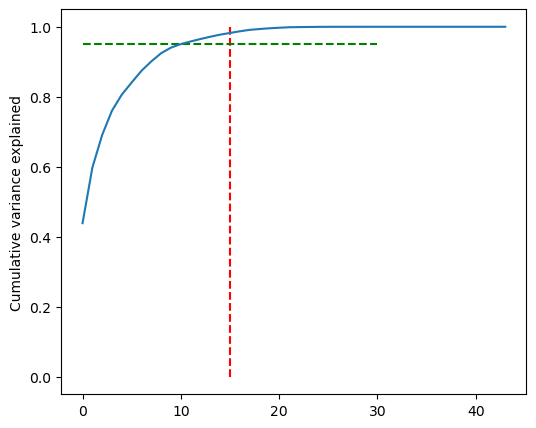

In [178]:
fig = plt.figure(figsize=[6,5])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

we can use IncrementalPCA for the best result

In [179]:
from sklearn.decomposition import IncrementalPCA

In [180]:
pca_final = IncrementalPCA(n_components=15)

In [181]:
df_train_pca = pca_final.fit_transform(X_train)

In [182]:
df_train_pca.shape

(24000, 15)

In [183]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [184]:
corrmat.shape

(15, 15)

In [185]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(6001, 15)

# 26. Logistic regression with PCA

#### Applying logistic regression on the Principal components

In [186]:
from sklearn.linear_model import LogisticRegression

In [187]:
learner_pca = LogisticRegression()

In [188]:
model_pca = learner_pca.fit(df_train_pca, y_train)

#### Making predictions on the test set

In [189]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [190]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.84'

#### Confusion matrix, Sensitivity and Specificity

In [191]:
pred_probs_test1 = model_pca.predict(df_test_pca)

In [192]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, pred_probs_test1)
print(confusion)

[[5506   28]
 [ 420   47]]


In [193]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [194]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, pred_probs_test1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9253457757040493
Sensitivity:- 0.1006423982869379
Specificity:- 0.9949403686302855


In [195]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

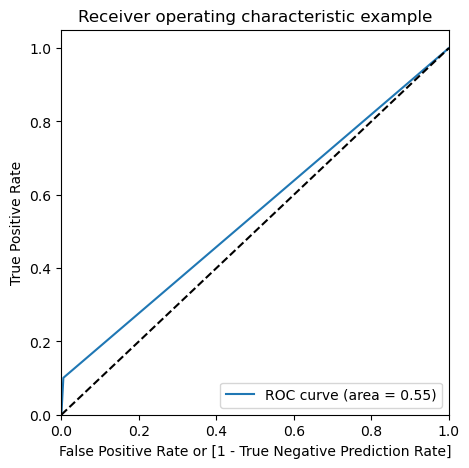

In [196]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_probs_test1, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_test, pred_probs_test1)

#### Making predictions on the train set

In [197]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [198]:
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1]))

'0.83'

#### Confusion matrix, Sensitivity and Specificity

In [199]:
pred_probs_train1 = model_pca.predict(df_train_pca)

In [200]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, pred_probs_train1)
print(confusion)

[[21876   150]
 [ 1796   178]]


In [201]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [202]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, pred_probs_train1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9189166666666667
Sensitivity:- 0.09017223910840932
Specificity:- 0.9931898665213839


In [203]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

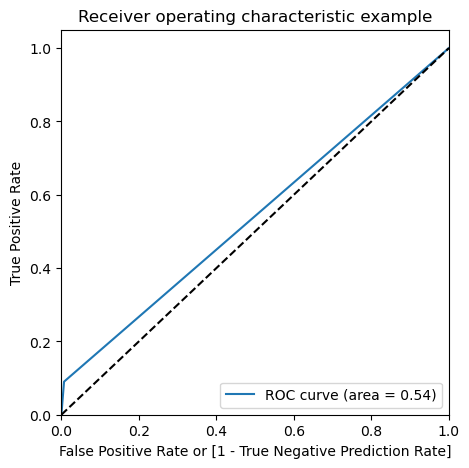

In [204]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_train, pred_probs_train1, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_train, pred_probs_train1)

# 27. Decision Tree with PCA

In [205]:
from sklearn.tree import DecisionTreeClassifier

In [206]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz


In [207]:
dt = DecisionTreeClassifier(random_state=42)

In [208]:
from sklearn.model_selection import GridSearchCV

In [209]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 150, 50]
}

In [210]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [211]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [50, 150, 50]},
             scoring='accuracy', verbose=1)

In [212]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.277352,0.012955,0.007810,0.007810,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,1
1,0.289049,0.013519,0.007812,0.007812,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 150}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,1
2,0.277282,0.006767,0.003906,0.006765,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,1
3,0.273373,0.017466,0.007811,0.007811,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 50}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,1
4,0.261657,0.006765,0.007810,0.007810,2,10,150,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 150}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,1


In [213]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.277352,0.012955,0.007810,0.007810,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,1
1,0.289049,0.013519,0.007812,0.007812,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 150}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,1
2,0.277282,0.006767,0.003906,0.006765,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,1
3,0.273373,0.017466,0.007811,0.007811,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 50}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,1
4,0.261657,0.006765,0.007810,0.007810,2,10,150,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 150}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,1


In [214]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=50,
                       random_state=42)

In [215]:
dt_best = DecisionTreeClassifier( random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=20,
                                  min_samples_split=50)

In [216]:
dt_best.fit(df_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=50,
                       random_state=42)

In [217]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [218]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

In [219]:
evaluate_model(dt_best)

Train Accuracy : 0.9310416666666667
Train Confusion Matrix:
[[21754   272]
 [ 1383   591]]
--------------------------------------------------
Test Accuracy : 0.9196800533244459
Test Confusion Matrix:
[[5425  109]
 [ 373   94]]


# 28.  Random Forest with PCA

In [220]:
from sklearn.ensemble import RandomForestClassifier

In [221]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [222]:
rf.fit(df_train_pca, y_train)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [223]:
rf.oob_score_

0.917875

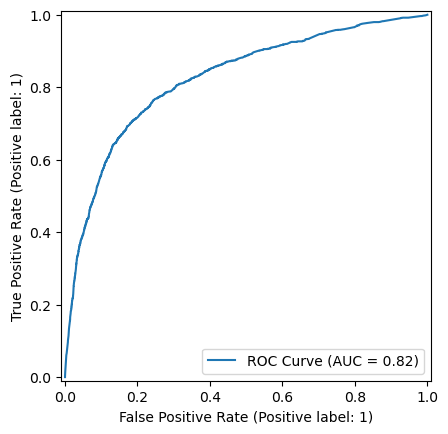

In [224]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
RocCurveDisplay.from_estimator(rf, df_train_pca, y_train, name="ROC Curve")

### Hyper-parameter tuning for the Random Forest

In [225]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [226]:
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [50,100],
    'min_samples_split': [ 100, 150, ],
    'n_estimators': [100, 200 ]
}

In [227]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [228]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [229]:
grid_search.best_score_

0.9177499999999998

In [230]:
grid_search.best_params_

{'max_depth': 2,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 100}

In [231]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=200)

In [232]:
rfc_model.fit(df_train_pca, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=200)

In [233]:
evaluate_model(rfc_model)

Train Accuracy : 0.9177083333333333
Train Confusion Matrix:
[[22025     1]
 [ 1974     0]]
--------------------------------------------------
Test Accuracy : 0.9221796367272121
Test Confusion Matrix:
[[5534    0]
 [ 467    0]]


In [234]:
feature_importances=rfc_model.feature_importances_

In [235]:
feature_importances

array([0.06058271, 0.02975803, 0.09415433, 0.01733459, 0.106419  ,
       0.11836413, 0.10582022, 0.01566478, 0.08484215, 0.23676135,
       0.01869643, 0.03240232, 0.04095927, 0.01414513, 0.02409557])

In [236]:
len(feature_importances)

15

In [237]:
# Get the names of the original columns
original_column_names = X_train.columns

# Generate the names for the principal components
pc_names = [f"PC{i+1}" for i in range(pca_final.n_components)]

# Create a dictionary mapping PC names to the corresponding original column names
pc_mapping = {pc_names[i]: original_column_names[j] for i, j in enumerate(range(pca_final.n_components))}

# Print or access the mapping to see the correspondence between PC names and original column names
print(pc_mapping)

{'PC1': 'arpu_8', 'PC2': 'onnet_mou_6', 'PC3': 'onnet_mou_7', 'PC4': 'onnet_mou_8', 'PC5': 'offnet_mou_6', 'PC6': 'offnet_mou_7', 'PC7': 'offnet_mou_8', 'PC8': 'og_others_6', 'PC9': 'og_others_7', 'PC10': 'og_others_8', 'PC11': 'ic_others_6', 'PC12': 'ic_others_7', 'PC13': 'ic_others_8', 'PC14': 'total_rech_num_6', 'PC15': 'total_rech_num_7'}


In [238]:
import pandas as pd

# Assuming original_column_names, pc_names, and pc_mapping are defined as described in your question

# Create a DataFrame from the pc_mapping dictionary
pc_df = pd.DataFrame(pc_mapping.items(), columns=['Principal Component', 'Original_Column'])

# Print or access the DataFrame to see the correspondence between PC names and original column names
print(pc_df)

   Principal Component   Original_Column
0                  PC1            arpu_8
1                  PC2       onnet_mou_6
2                  PC3       onnet_mou_7
3                  PC4       onnet_mou_8
4                  PC5      offnet_mou_6
5                  PC6      offnet_mou_7
6                  PC7      offnet_mou_8
7                  PC8       og_others_6
8                  PC9       og_others_7
9                 PC10       og_others_8
10                PC11       ic_others_6
11                PC12       ic_others_7
12                PC13       ic_others_8
13                PC14  total_rech_num_6
14                PC15  total_rech_num_7


In [239]:
# Assuming rfc_model is your RandomForestClassifier model
feature_importances = rfc_model.feature_importances_

# Extract column names from the original dataset
#column_names = df_train_pca.columns

# Create a DataFrame to combine feature importances with column names
importance_df = pd.DataFrame({
    'Feature': pc_df.Original_Column,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame
print(importance_df_sorted)




             Feature  Importance
9        og_others_8    0.236761
5       offnet_mou_7    0.118364
4       offnet_mou_6    0.106419
6       offnet_mou_8    0.105820
2        onnet_mou_7    0.094154
8        og_others_7    0.084842
0             arpu_8    0.060583
12       ic_others_8    0.040959
11       ic_others_7    0.032402
1        onnet_mou_6    0.029758
14  total_rech_num_7    0.024096
10       ic_others_6    0.018696
3        onnet_mou_8    0.017335
7        og_others_6    0.015665
13  total_rech_num_6    0.014145




# 29. Conclusion :

Based on accuracy, the Random Forest model is the most effective for predicting churn.

Outgoing calls, whether local (same operator mobile, other operator mobile, fixed lines), STD, or special, are crucial in assessing the likelihood of churn. Therefore, the operator should focus on analyzing Outgoing call data and consider offering special incentives to customers with decreasing Outgoing call volumes.


 After cleaning the data, we applied three primary models, including various iterations within these models, to identify the best performer in each case.

#### Logistic Regression  :

Logistic Regression with RFE Logistic regression with PCA Random Forest For each of these models, the summary of performance measures are as follows:

#### Logistic Regression

.  Train Accuracy : ~79%
. Test Accuracy : ~80%

#### Logistic regression with PCA

. Train Accuracy : ~91%
. Test Accuracy : ~92%

#### Decision Tree with PCA:

. Train Accuracy : ~93%
. Test Accuracy : ~92%


#### Random Forest with PCA:
. Train Accuracy :~ 91%
. Test Accuracy :~ 92%